<a href="https://colab.research.google.com/github/VikaBilyk/numeric_methods/blob/main/lab3/lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ітерація 0: x = 0.5, y = 0.5, z = -1, точність = 0.5
Ітерація 1: x = 0.41666666666666663, y = 0.41666666666666663, z = -0.8333333333333333, точність = 0.04166666666666652
Ітерація 2: x = 0.4083333333333333, y = 0.4083333333333333, z = -0.8166666666666667, точність = 0.0004166666666667318
Ітерація 3: x = 0.4082482993197279, y = 0.4082482993197279, z = -0.8164965986394558, точність = 4.338470072084988e-08
Знайдено розв'язок: x = 0.4082482993197279, y = 0.4082482993197279, z = -0.8164965986394558 за 3 ітерацій
Розв'язок: (0.4082482993197279, 0.4082482993197279, -0.8164965986394558)


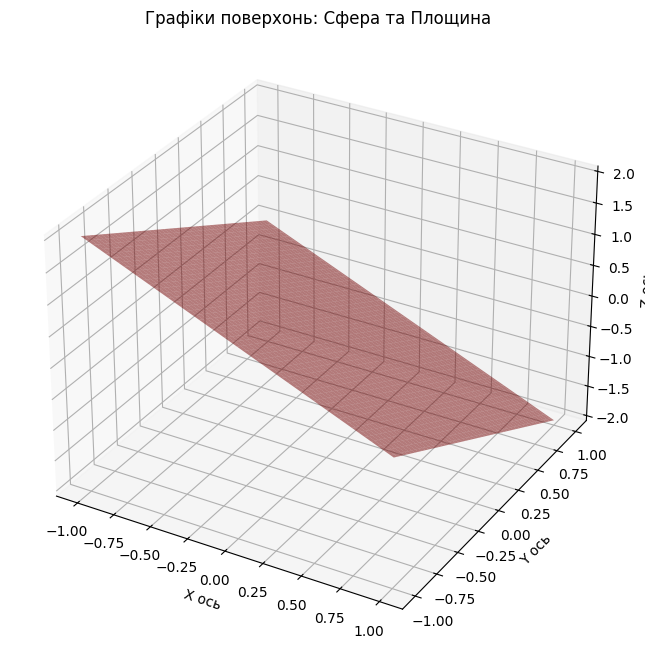

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Визначення рівнянь
def f1(x, y, z):
    return x**2 + y**2 + z**2 - 1  # Сфера

def f2(x, y, z):
    return x + y + z  # Площина

# Вектор функцій
def F(x, y, z):
    return np.array([f1(x, y, z), f2(x, y, z)])

# Якобі матриця
def jacobi(x, y, z):
    return np.array([
        [2 * x, 2 * y, 2 * z],
        [1, 1, 1]
    ])

# Модифікований метод Ньютона
def modified_newton_method_fixed_jacobian(x0, y0, z0, tol=1e-6, max_iter=100):
    x, y, z = x0, y0, z0

    for iteration in range(max_iter):
        # Обчислюємо значення функцій у поточній точці (x, y, z)
        F_val = F(x, y, z)

        # Виводимо значення на кожній ітерації
        accuracy = np.linalg.norm(F_val, ord=2)
        print(f"Ітерація {iteration}: x = {x}, y = {y}, z = {z}, точність = {accuracy}")

        # Перевіряємо умову збіжності
        if accuracy < tol:
            print(f"Знайдено розв'язок: x = {x}, y = {y}, z = {z} за {iteration} ітерацій")
            return x, y, z

        # Обчислюємо матрицю Якобі в поточній точці
        J = jacobi(x, y, z)
        J_inv = np.linalg.pinv(J)  # Використовуємо псевдообернену матрицю

        # Розв'язуємо для delta
        delta = -J_inv @ F_val

        # Оновлюємо значення x, y, z
        x, y, z = x + delta[0], y + delta[1], z + delta[2]

    print("Розв'язок не знайдено за вказану кількість ітерацій.")
    return None

# Графік поверхонь
def plot_surfaces():
    # Створюємо сітку для графіків
    x = np.linspace(-1, 1, 100)
    y = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x, y)

    # Обчислюємо z для сфери та площини
    z_sphere_positive = np.sqrt(np.maximum(0, 1 - x**2 - y**2))
    z_sphere_negative = -np.sqrt(np.maximum(0, 1 - x**2 - y**2))

    # Маска для фільтрації ненадійних значень
    valid_mask = (x**2 + y**2 <= 1)
    z_sphere_positive[~valid_mask] = np.nan
    z_sphere_negative[~valid_mask] = np.nan

    z_plane = -x - y  # З формули площини

    # Створюємо 3D графік
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Графік сфери
    ax.plot_surface(x, y, z_sphere_positive, color='b', alpha=0.5, rstride=100, cstride=100)
    ax.plot_surface(x, y, z_sphere_negative, color='b', alpha=0.5, rstride=100, cstride=100)

    # Графік площини
    ax.plot_surface(x, y, z_plane, color='r', alpha=0.5)

    # Налаштування графіка
    ax.set_xlabel('X ось')
    ax.set_ylabel('Y ось')
    ax.set_zlabel('Z ось')
    ax.set_title('Графіки поверхонь: Сфера та Площина')

    plt.show()

# Початкове наближення
x0, y0, z0 = 0.5, 0.5, -1  # Спробуємо початкове наближення ближче до очікуваного розв'язку

# Запускаємо метод
solution = modified_newton_method_fixed_jacobian(x0, y0, z0)

if solution:
    print("Розв'язок:", solution)
else:
    print("Не вдалося знайти розв'язок.")

# Побудова графіків поверхонь
plot_surfaces()
